In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
#import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ori_data = pd.read_csv("data/Time_Series_Data_withoutlabel.csv").value.values

In [4]:
SEQ_LEN = 15
MEAN = ori_data.mean()
STD = ori_data.std()

In [5]:
data = (ori_data - MEAN) / STD

In [6]:
def load_data(data, seq_len, is_shuffle):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    if is_shuffle:
        np.random.shuffle(result)
    x_train = result[:, :-1]
    y_train = result[:, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train

In [7]:
x_train, y_train = load_data(data, SEQ_LEN, True)

In [8]:
print(x_train.shape)
print(y_train.shape)

(2484, 15, 1)
(2484,)


In [9]:
def build_model():
    model = Sequential()

    model.add(LSTM(50,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(100,return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

In [10]:
model = build_model()
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
19/19 [==============================] - 8s 99ms/step - loss: 0.6905 - val_loss: 1.6943
Epoch 2/100
19/19 [==============================] - 1s 79ms/step - loss: 0.4339 - val_loss: 1.6114
Epoch 3/100
19/19 [==============================] - 1s 70ms/step - loss: 0.4059 - val_loss: 1.5161
Epoch 4/100
19/19 [==============================] - 1s 53ms/step - loss: 0.4289 - val_loss: 1.4421
Epoch 5/100
19/19 [==============================] - 1s 53ms/step - loss: 0.6513 - val_loss: 1.4005
Epoch 6/100
19/19 [==============================] - 1s 46ms/step - loss: 0.4214 - val_loss: 1.3549
Epoch 7/100
19/19 [==============================] - 1s 48ms/step - loss: 0.6375 - val_loss: 1.3413
Epoch 8/100
19/19 [==============================] - 1s 56ms/step - loss: 0.2591 - val_loss: 1.3586
Epoch 9/100
19/19 [==============================] - 1s 57ms/step - loss: 0.4174 - val_loss: 1.3206
Epoch 10/100
19/19 [==============================] - 1s 49ms/step - loss: 0.3118 - val_loss: 1.3324

In [11]:
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [12]:
x_test, y_test = load_data(data, SEQ_LEN, False)

In [13]:
predicted_data = predict_point_by_point(model, x_test)

In [14]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(figsize=(20,5))
    plt.plot(true_data, 'r', label='True Data')
    plt.plot(predicted_data, 'g', label='Prediction')
    plt.show()

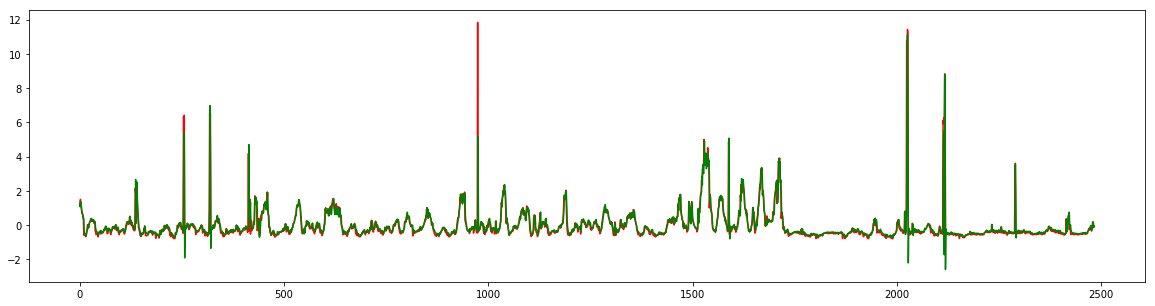

In [15]:
plot_results(predicted_data, y_test)

In [16]:
abnormal_idx = np.argmax(np.abs(predicted_data-y_test))

In [17]:
abnormal_idx

974

In [18]:
abnormal_real_idx = abnormal_idx + SEQ_LEN

In [19]:
abnormal_real_idx

989

In [20]:
abnormal_data = ori_data[abnormal_real_idx]

In [21]:
abnormal_data

5059